In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, timedelta

import pandas as pd

import scipy.ndimage as ndi
import imageio as imio

import fix_yahoo_finance as yf 

%matplotlib inline

# Minkowski dimension

In [2]:
yesterday = (date.today() - timedelta(1)).strftime('%Y-%m-%d')

# Fetch data
tickers = ['AAPL', 'AMZN', 'BTC-USD', 'ETH-USD']
init_date = '2016-01-01'
final_date = yesterday

asset_data = yf.download(tickers, init_date, final_date)
print(asset_data.Close)

[*********************100%***********************]  4 of 4 downloaded
                  AAPL         AMZN      BTC-USD     ETH-USD
Date                                                        
2016-01-01         NaN          NaN   433.989990    0.920000
2016-01-02         NaN          NaN   433.720001    0.954700
2016-01-03         NaN          NaN   430.700012    0.960000
2016-01-04  105.349998   636.989990   433.320007    0.950000
2016-01-05  102.709999   633.789978   431.200012    0.942600
2016-01-06  100.699997   632.650024   430.820007    0.950000
2016-01-07   96.449997   607.940002   457.049988    0.940000
2016-01-08   96.959999   607.049988   452.869995    0.985000
2016-01-09         NaN          NaN   448.309998    0.985000
2016-01-10         NaN          NaN   446.190002    1.000000
2016-01-11   98.529999   617.739990   447.720001    1.080000
2016-01-12   99.959999   617.890015   445.040009    1.220000
2016-01-13   97.389999   581.809998   432.179993    1.140000
2016-01-14   99

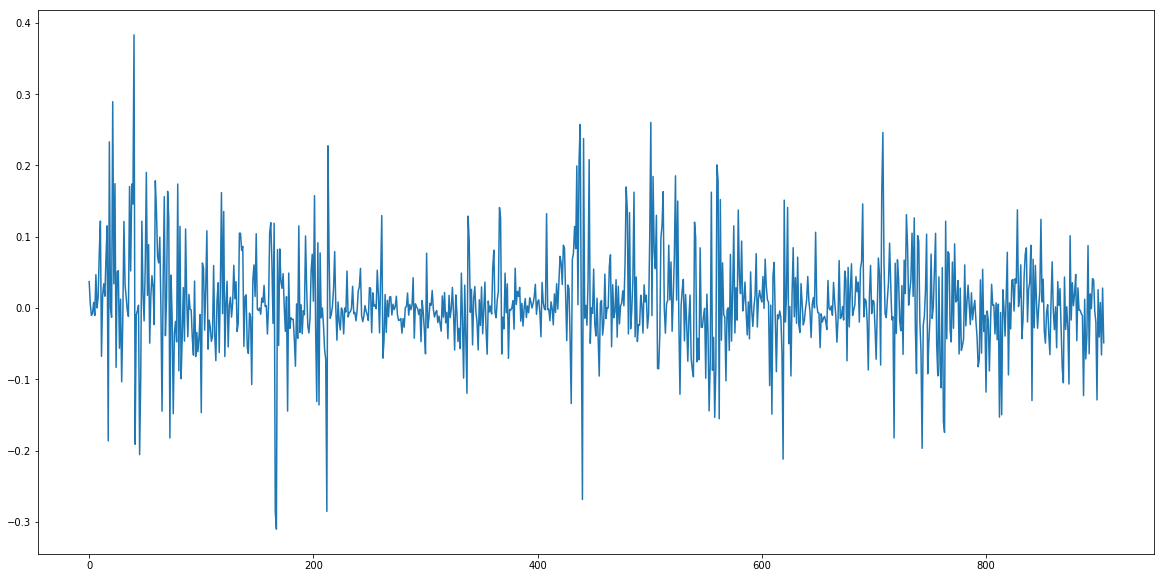

In [3]:
# Get return
eth_close = asset_data.Close['ETH-USD'].values
r_eth = np.diff(np.log(eth_close))

plt.figure(figsize=(20,10))
plt.plot(r_eth)
plt.show()

In [10]:
def plot_image(in_arr):
    
    # Reshape plot
    dl = np.size(in_arr)
    x_arr = in_arr*dl/(np.max(in_arr) - np.min(in_arr))
    t = 0
    x = x_arr[0]
    
    # Save plot as image
    plt.figure(figsize=(200,100))
    plt.axis('off')
    plt.plot(x_arr, 'k', linewidth=1.0)
    plt.savefig("plot.png", bbox_inches='tight')
    plt.show()

In [11]:
# Save plot as image file
plot_image(r_eth)
# Open image file as 2D array
I_eth = plt.imread("plot.png")

MemoryError: 

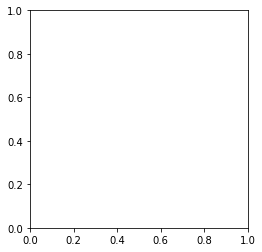

In [13]:
plt.imshow(I_eth)
print(I_eth.shape)

In [ ]:
def Minkowski_dim(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]